### 1. Data Prep

In [2]:
import pandas as pd
import numpy as np
import kagglehub
import matplotlib.pyplot as plt
# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

Path to dataset files: /home/codespace/.cache/kagglehub/datasets/blastchar/telco-customer-churn/versions/1


In [3]:
df = pd.read_csv('/home/codespace/.cache/kagglehub/datasets/blastchar/telco-customer-churn/versions/1/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [5]:
categorical_columns = list(df.dtypes[df.dtypes.values == "object"].index)

In [6]:
for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [7]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')

In [8]:
df.totalcharges = df.totalcharges.fillna(0)

In [9]:
df['churn'] = np.where(df['churn'] == 'no', 0, 1)

### 2. Validation Framework

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [12]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [13]:
df_full_train = df_full_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

In [14]:
y_train = df_train.churn.values
y_test = df_test.churn.values
y_val = df_val.churn.values

In [15]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

### 3. EDA

In [16]:
numerical = ['totalcharges', 'monthlycharges', 'tenure']

In [17]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents', 
               'phoneservice', 'multiplelines', 'internetservice',
               'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
               'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling','paymentmethod']

In [18]:
numeric_variables = list(df_full_train.dtypes[df_full_train.dtypes.values == "int"].index)

In [19]:
numeric_variables

['seniorcitizen', 'tenure', 'churn']

### 4. Feature Importance

In [19]:
df_full_train[df_full_train.gender=='male'].churn.mean()
df_full_train[df_full_train.gender=='female'].churn.mean()

np.float64(0.27682403433476394)

In [22]:
df_full_train.groupby(by='gender').churn.mean()

gender
female    0.276824
male      0.263214
Name: churn, dtype: float64

In [23]:
df_gender_group = df_full_train.groupby(by='gender').churn.agg(['mean'])
df_gender_group['diff'] = df_gender_group['mean'] - df_full_train.churn.mean()
df_gender_group['risk'] = df_gender_group['mean'] / df_full_train.churn.mean()

In [24]:
from IPython.display import display

In [25]:
for c in categorical_columns:
    print(c)
    df_group = df_full_train.groupby(by=c).churn.agg(['mean'])
    df_group['diff'] = df_group['mean'] - df_full_train.churn.mean()
    df_group['risk'] = df_group['mean'] / df_full_train.churn.mean()
    display(df_group)
    print()
    print(20 * '#')

customerid


mean      diff      risk
customerid                          
0002-orfbo   0.0 -0.269968  0.000000
0004-tlhlj   1.0  0.730032  3.704142
0011-igkff   1.0  0.730032  3.704142
0013-exchz   1.0  0.730032  3.704142
0013-mhzwf   0.0 -0.269968  0.000000
...          ...       ...       ...
9987-lutyd   0.0 -0.269968  0.000000
9992-rramn   1.0  0.730032  3.704142
9992-ujoel   0.0 -0.269968  0.000000
9993-lhieb   0.0 -0.269968  0.000000
9995-hotoh   0.0 -0.269968  0.000000

[5634 rows x 3 columns]


####################
gender


mean      diff      risk
gender                              
female  0.276824  0.006856  1.025396
male    0.263214 -0.006755  0.974980


####################
partner


mean      diff      risk
partner                              
no       0.329809  0.059841  1.221659
yes      0.205033 -0.064935  0.759472


####################
dependents


mean      diff      risk
dependents                              
no          0.313760  0.043792  1.162212
yes         0.165666 -0.104302  0.613651


####################
phoneservice


mean      diff      risk
phoneservice                              
no            0.241316 -0.028652  0.893870
yes           0.273049  0.003081  1.011412


####################
multiplelines


mean      diff      risk
multiplelines                                 
no                0.257407 -0.012561  0.953474
no_phone_service  0.241316 -0.028652  0.893870
yes               0.290742  0.020773  1.076948


####################
internetservice


mean      diff      risk
internetservice                              
dsl              0.192347 -0.077621  0.712482
fiber_optic      0.425171  0.155203  1.574895
no               0.077805 -0.192163  0.288201


####################
onlinesecurity


mean      diff      risk
onlinesecurity                                   
no                   0.420921  0.150953  1.559152
no_internet_service  0.077805 -0.192163  0.288201
yes                  0.153226 -0.116742  0.567570


####################
onlinebackup


mean      diff      risk
onlinebackup                                     
no                   0.404323  0.134355  1.497672
no_internet_service  0.077805 -0.192163  0.288201
yes                  0.217232 -0.052736  0.804660


####################
deviceprotection


mean      diff      risk
deviceprotection                                 
no                   0.395875  0.125907  1.466379
no_internet_service  0.077805 -0.192163  0.288201
yes                  0.230412 -0.039556  0.853480


####################
techsupport


mean      diff      risk
techsupport                                      
no                   0.418914  0.148946  1.551717
no_internet_service  0.077805 -0.192163  0.288201
yes                  0.159926 -0.110042  0.592390


####################
streamingtv


mean      diff      risk
streamingtv                                      
no                   0.342832  0.072864  1.269897
no_internet_service  0.077805 -0.192163  0.288201
yes                  0.302723  0.032755  1.121328


####################
streamingmovies


mean      diff      risk
streamingmovies                                  
no                   0.338906  0.068938  1.255358
no_internet_service  0.077805 -0.192163  0.288201
yes                  0.307273  0.037305  1.138182


####################
contract


mean      diff      risk
contract                                    
month-to-month  0.431701  0.161733  1.599082
one_year        0.120573 -0.149395  0.446621
two_year        0.028274 -0.241694  0.104730


####################
paperlessbilling


mean      diff      risk
paperlessbilling                              
no                0.172071 -0.097897  0.637375
yes               0.338151  0.068183  1.252560


####################
paymentmethod


mean      diff      risk
paymentmethod                                          
bank_transfer_(automatic)  0.168171 -0.101797  0.622928
credit_card_(automatic)    0.164339 -0.105630  0.608733
electronic_check           0.455890  0.185922  1.688682
mailed_check               0.193870 -0.076098  0.718121


####################
totalcharges


mean      diff      risk
totalcharges                          
0.00           0.0 -0.269968  0.000000
18.80          0.0 -0.269968  0.000000
18.85          0.5  0.230032  1.852071
18.90          0.0 -0.269968  0.000000
19.00          0.0 -0.269968  0.000000
...            ...       ...       ...
8547.15        0.0 -0.269968  0.000000
8564.75        0.0 -0.269968  0.000000
8594.40        0.0 -0.269968  0.000000
8670.10        0.0 -0.269968  0.000000
8684.80        1.0  0.730032  3.704142

[5291 rows x 3 columns]


####################
churn


mean      diff      risk
churn                          
0       0.0 -0.269968  0.000000
1       1.0  0.730032  3.704142


####################


### 5. Feature Importance: Mutual Information

In [26]:
from sklearn.metrics import mutual_info_score

In [27]:
def mutual_info_churn(series):
    return mutual_info_score(df_full_train.churn, series)

In [28]:
mi = df_full_train[categorical].apply(mutual_info_churn)
mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

### 6. Feature Importance: Correlation for numerical variables

In [27]:
df_full_train[numerical].corrwith(df_full_train.churn)

totalcharges     -0.196353
monthlycharges    0.196805
tenure           -0.351885
dtype: float64

### 7. One-hot encoding
Preparing feature matrices for training

In [28]:
from sklearn.feature_extraction import DictVectorizer

In [29]:
dv = DictVectorizer(sparse=False)

In [30]:
train_dicts = df_train[categorical + numerical].to_dict(orient='records')
val_dicts = df_val[categorical + numerical].to_dict(orient='records')
test_dicts = df_test[categorical + numerical].to_dict(orient='records')

Why do we fit_transform **only on training** but transform only val and test data?

When `DictVectorizer` calls `fit`, it learns the vocabulary—specifically, it creates a mapping of all unique category values to column indices. For example, if your training data has `color: [red, blue, green]`, it creates columns 0, 1, 2 for those values.

If you call `fit_transform` on your validation or test set separately, two problems occur:

1. **Different column ordering**: The test set might encounter categories in a different order, creating a different column arrangement. Column 0 might be "blue" instead of "red".

2. **Missing or extra categories**: Your test set might not have "green" at all (so no column for it), or might have "yellow" (creating a new column that didn't exist in training). Now your model trained on 3 columns receives data with 2 or 4 columns.

Using `transform` only (without `fit`) forces the test data into the exact same structure learned from training. Unknown categories get ignored, and missing categories get zero values—but the column structure stays consistent with what the model expects.

In [31]:
X_train = dv.fit_transform(train_dicts)
X_val = dv.transform(val_dicts)
X_test = dv.transform(test_dicts)

### 8. Logistic Regression

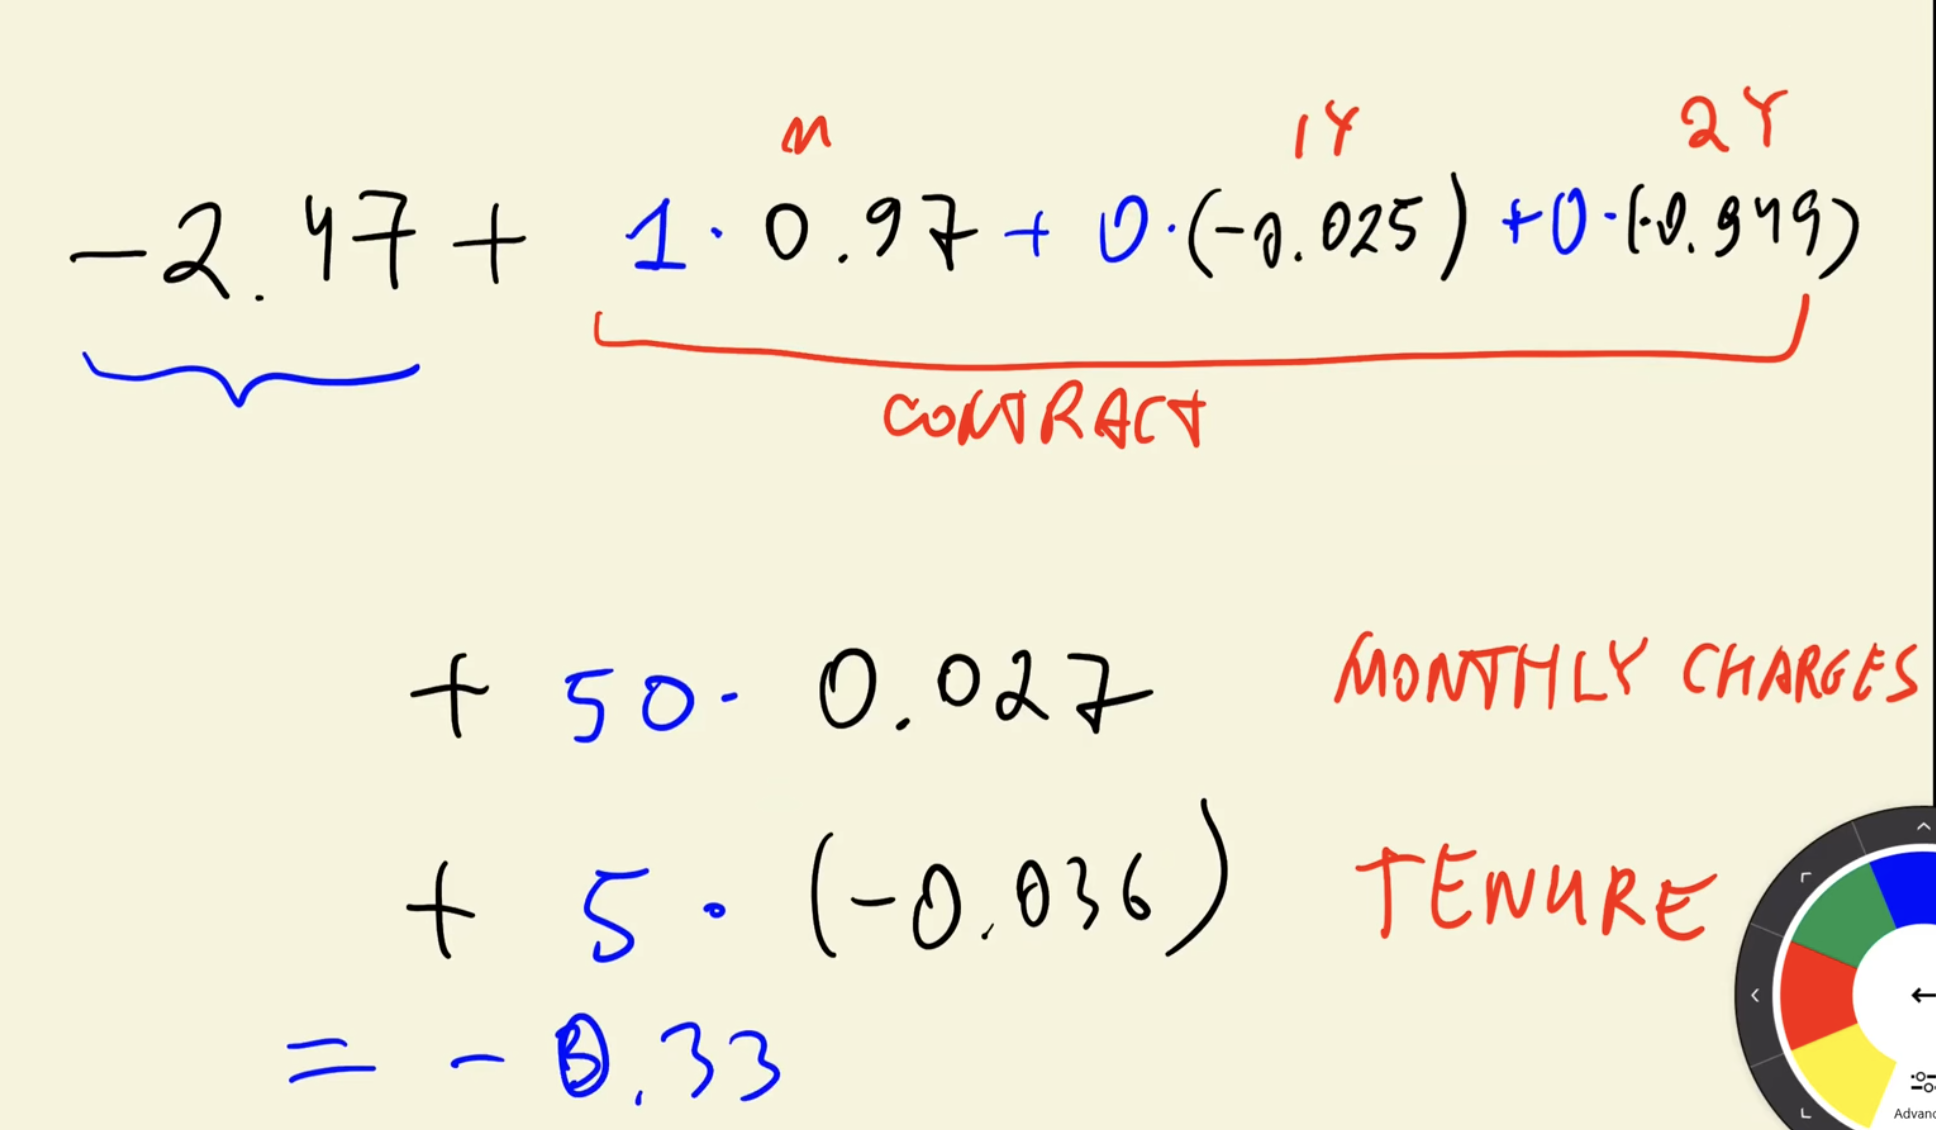

The raw output is coming from w0 + w(X).

The raw output (e.g. -0.33) is in log-odds space, which ranges from -∞ to +∞. That's not interpretable as a probability.
Sigmoid squashes any number into the 0-1 range, giving you an actual probability. Your -0.33 becomes 0.418, meaning "this customer has a 41.8% chance of churning."

Starting with  log-odds value: **z = -0.33**

---

**Log-odds → Probability (sigmoid)**

$$p = \frac{1}{1 + e^{-z}} = \frac{1}{1 + e^{-(-0.33)}} = \frac{1}{1 + e^{0.33}} = \frac{1}{1 + 1.391} = \frac{1}{2.391} = 0.418$$

---

**Probability → Log-odds (logit) — the reverse**

$$z = \ln\left(\frac{p}{1-p}\right) = \ln\left(\frac{0.418}{1-0.418}\right) = \ln\left(\frac{0.418}{0.582}\right) = \ln(0.718) = -0.33$$

---

They're inverse functions. The model outputs -0.33 (log-odds), sigmoid converts it to 0.418 (probability), and logit would convert it right back.

In [32]:
# make the number between 0 and 1
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
model = LogisticRegression(max_iter=5000)

In [35]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [36]:
model.predict(X_val)

array([0, 0, 0, ..., 0, 1, 1], shape=(1409,))

In [37]:
model.predict_proba(X_val) # left col is prob of not churn, right is prob of churn which is what we are interested in

array([[0.99333409, 0.00666591],
       [0.7951737 , 0.2048263 ],
       [0.78229605, 0.21770395],
       ...,
       [0.84843993, 0.15156007],
       [0.21129582, 0.78870418],
       [0.18808166, 0.81191834]], shape=(1409, 2))

In [38]:
y_predict = model.predict_proba(X_val)[:,1]

In [39]:
churn_decisions = (y_predict >= 0.5)

In [40]:
df_val[churn_decisions].customerid # customers that possibly churn

3       8433-wxgna
8       3440-jpscl
12      7228-omtpn
19      6711-fldfb
24      2612-ranwt
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 315, dtype: object

In [41]:
(y_val == churn_decisions).mean()

np.float64(0.8034066713981547)

In [29]:
from sklearn.metrics import root_mean_squared_error

In [43]:
y_pred = model.predict(X_test)
root_mean_squared_error(y_test, y_pred)

0.4336780489100855

### 9. Model Interpretation

In [44]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'contract=month-to-month': np.float64(0.686),
 'contract=one_year': np.float64(0.032),
 'contract=two_year': np.float64(-0.678),
 'dependents=no': np.float64(0.055),
 'dependents=yes': np.float64(-0.015),
 'deviceprotection=no': np.float64(0.113),
 'deviceprotection=no_internet_service': np.float64(-0.16),
 'deviceprotection=yes': np.float64(0.087),
 'gender=female': np.float64(0.039),
 'gender=male': np.float64(0.001),
 'internetservice=dsl': np.float64(-0.498),
 'internetservice=fiber_optic': np.float64(0.698),
 'internetservice=no': np.float64(-0.16),
 'monthlycharges': np.float64(-0.018),
 'multiplelines=no': np.float64(-0.188),
 'multiplelines=no_phone_service': np.float64(0.068),
 'multiplelines=yes': np.float64(0.159),
 'onlinebackup=no': np.float64(0.117),
 'onlinebackup=no_internet_service': np.float64(-0.16),
 'onlinebackup=yes': np.float64(0.083),
 'onlinesecurity=no': np.float64(0.284),
 'onlinesecurity=no_internet_service': np.float64(-0.16),
 'onlinesecurity=yes': np.flo

### 10. Accuracy

#### Full Model

In [45]:
(y_val == churn_decisions).mean()

np.float64(0.8034066713981547)

In [46]:
thresholds = np.linspace(0,1,21)
thresholds

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [47]:
scores = []
for t in thresholds:
    churn_decisions = (y_predict >= t)
    score = (y_val == churn_decisions).mean()
    scores.append(score)
pd.DataFrame(scores, index=thresholds)

0
0.00  0.273953
0.05  0.513130
0.10  0.608233
0.15  0.662172
0.20  0.702626
0.25  0.734564
0.30  0.758694
0.35  0.764372
0.40  0.781405
0.45  0.791341
0.50  0.803407
0.55  0.801987
0.60  0.795600
0.65  0.788502
0.70  0.765791
0.75  0.742370
0.80  0.728886
0.85  0.726047
0.90  0.726047
0.95  0.726047
1.00  0.726047

In [48]:
from sklearn.metrics import accuracy_score

In [49]:
y_predict = model.predict(X_val)

In [50]:
y_predict

array([0, 0, 0, ..., 0, 1, 1], shape=(1409,))

In [51]:
accuracy_score(y_val, y_predict) # Take away: accuracy scoring can be quite misleading if there is a imbalance in our dataset: 
# 1/4 of the dataset is churning, 3/4 is not churning. Just by assuming most customers are not going to churn, we get 75% accuracy.
# more details here: https://youtu.be/FW_l7lB0HUI?si=9DyVl7oJi0mrIRla

0.8034066713981547

### 11. Confusion Table

In [52]:
len(y_val)

1409

In [53]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [54]:
predict_positive = (y_predict == 1)
predict_negative = (y_predict == 0)

In [55]:
tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()

In [56]:
fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()

In [57]:
tp, tn

(np.int64(212), np.int64(920))

In [58]:
ct = np.array([['Actual Negative', tn, fp], ['Actual Positive', fn,tp]])
conf_df = pd.DataFrame(ct, columns=['Actual','Predict Negative', 'Predict Positive'])
conf_df.set_index(['Actual'])

Predict Negative Predict Positive
Actual                                           
Actual Negative              920              103
Actual Positive              174              212

### 12. Precision & Recall

Precision

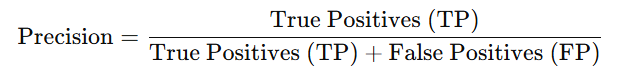

It shows how many of the “yes” predictions made by the model were actually correct. It helps us reduce wrong “yes” guesses which are called false positives (FP).

“Of the things I predicted as positive, how many were actually positive?”

In [59]:
precision = tp / (tp+fp)
precision

np.float64(0.6730158730158731)

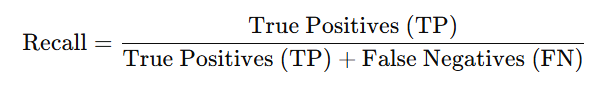

Recall tells us how well a model finds all the correct “yes” cases in the data. It checks how many real positive cases the model was able to correctly identify.

“Of all the actual positives, how many did my model catch?”

In [60]:
recall = tp / (tp+fn)
recall

np.float64(0.5492227979274611)

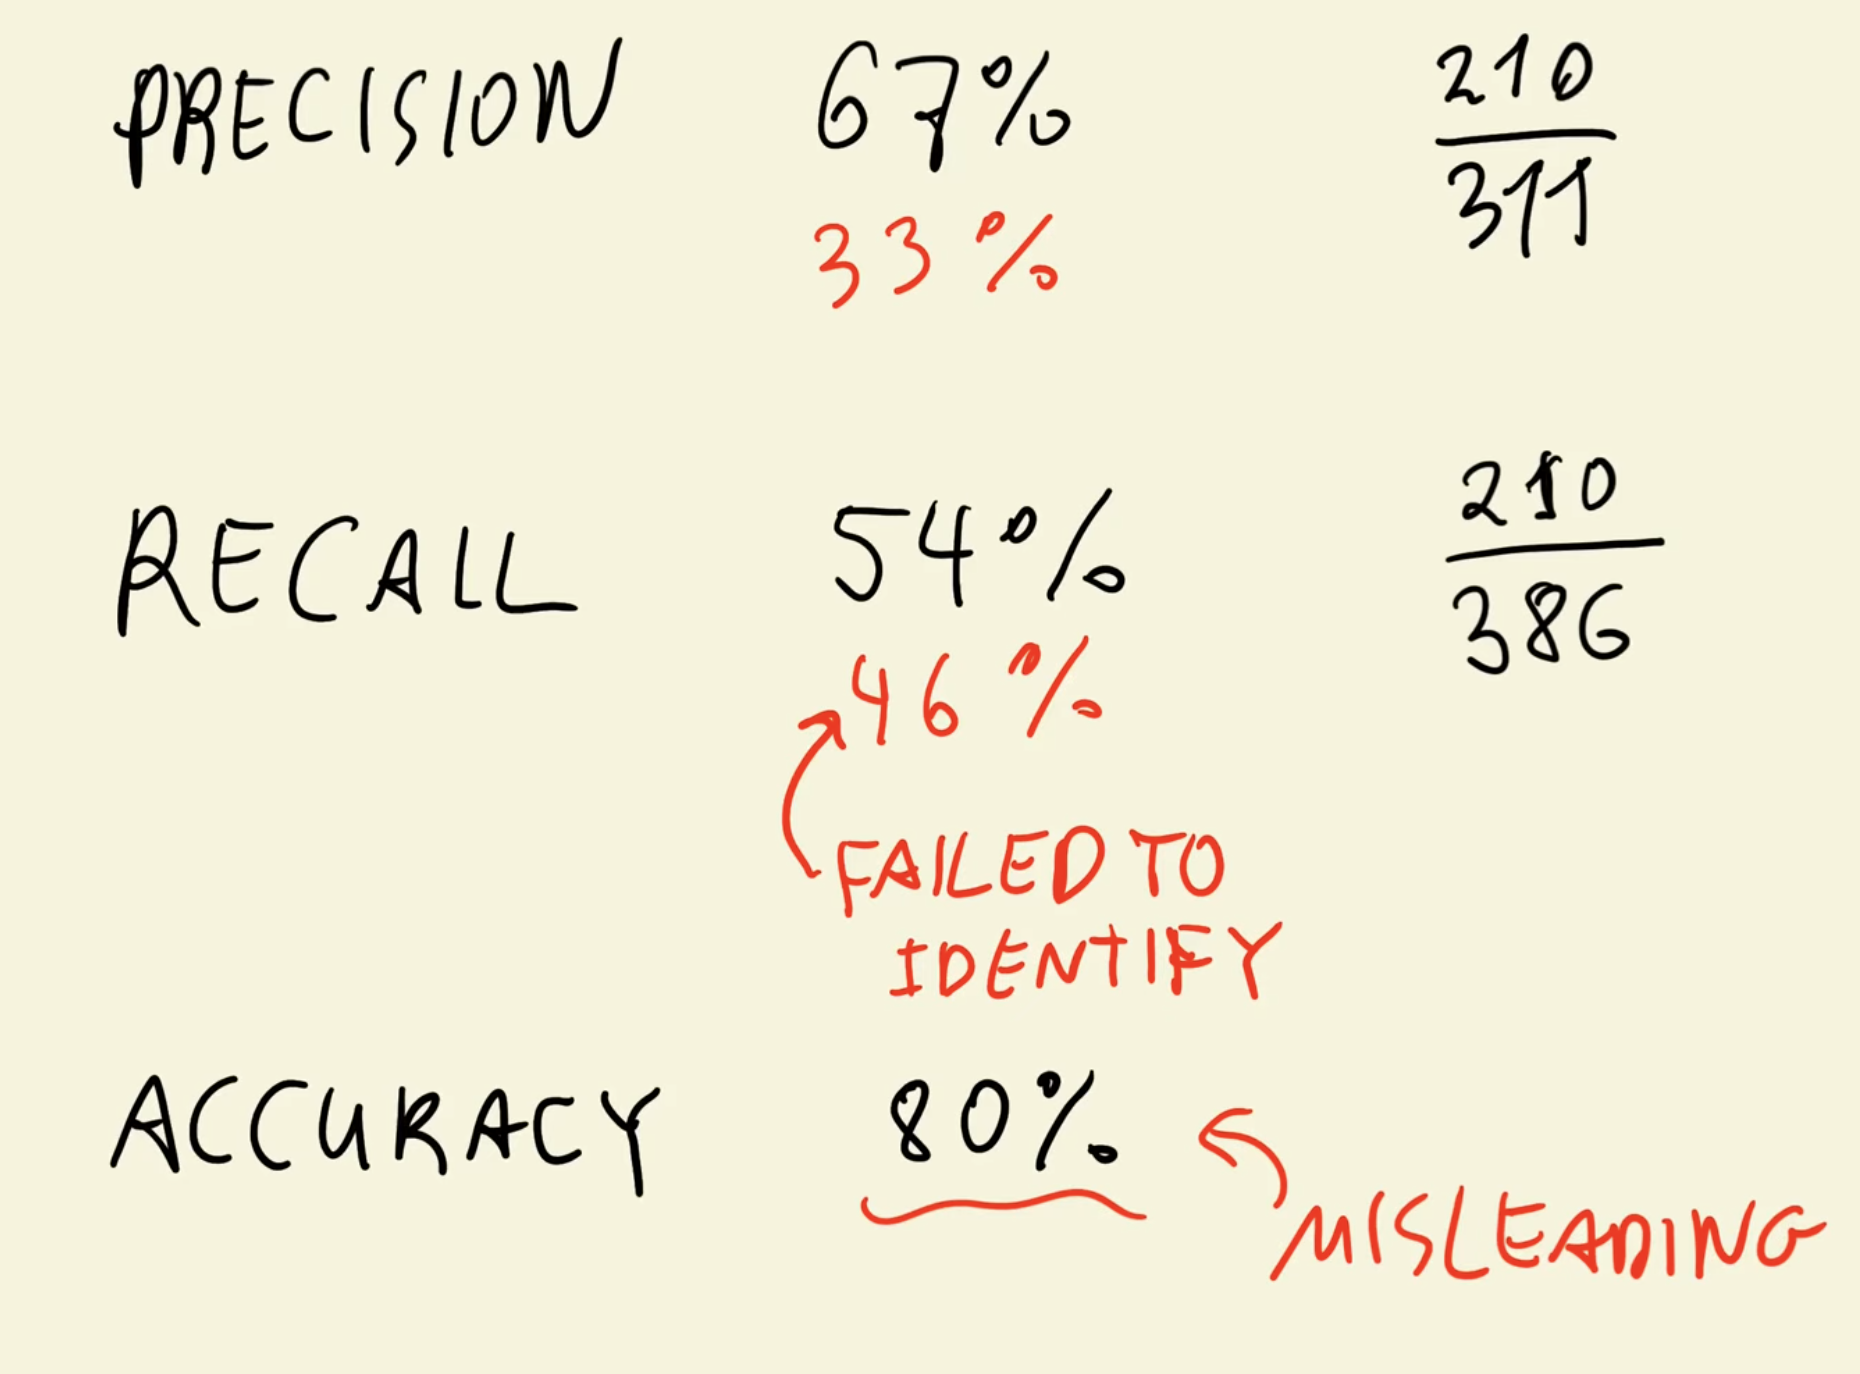

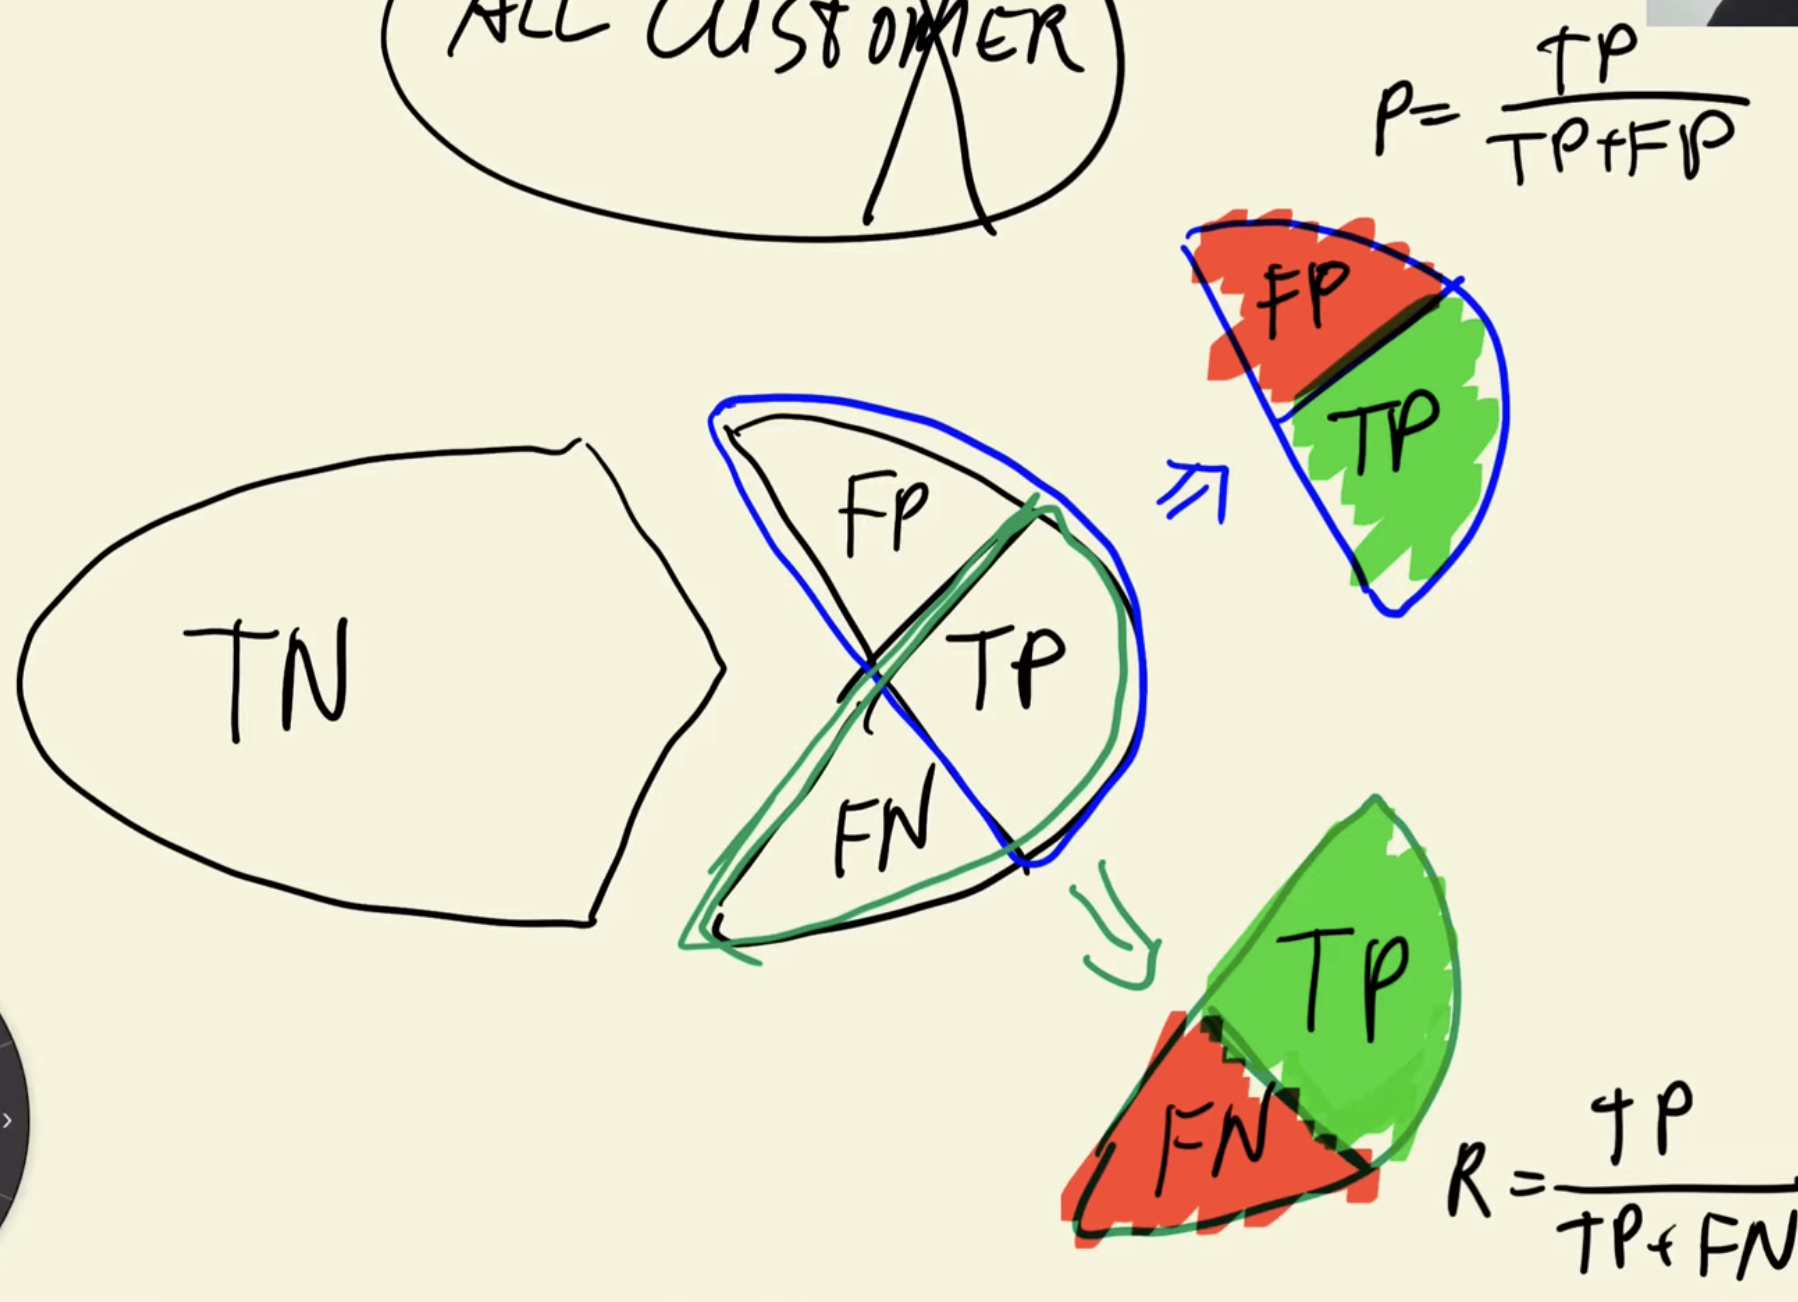

### 13. ROC Curves

#### TPR and FPR

In [61]:
tpr = tp / (tp + fn)
tpr # same as recall

np.float64(0.5492227979274611)

In [62]:
fpr = fp / (fp + tn)
fpr

np.float64(0.10068426197458455)

In [63]:
model.predict_proba(X_val)
y_predict = model.predict_proba(X_val)[:,1]

In [64]:
y_predict

array([0.00666591, 0.2048263 , 0.21770395, ..., 0.15156007, 0.78870418,
       0.81191834], shape=(1409,))

In [65]:
scores = []
thresholds = np.linspace(0,1,101)

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    predict_positive = (y_predict >= t)
    predict_negative = (y_predict < t)
    
    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()

    scores.append((t, tp, fp, fn, tn))

In [66]:
roc_df = pd.DataFrame(scores, columns=['threshold', 'tp', 'fp', 'fn', 'tn'])

In [67]:
roc_df['tpr'] = roc_df.tp / (roc_df.tp + roc_df.fn) # calculate true positive rates
roc_df['fpr'] = roc_df.fp / (roc_df.fp + roc_df.tn) # calculate false positive rates

In [68]:
roc_df[40:50:]

threshold   tp   fp   fn   tn       tpr       fpr
40       0.40  253  175  133  848  0.655440  0.171065
41       0.41  251  165  135  858  0.650259  0.161290
42       0.42  249  159  137  864  0.645078  0.155425
43       0.43  241  150  145  873  0.624352  0.146628
44       0.44  236  145  150  878  0.611399  0.141740
45       0.45  231  139  155  884  0.598446  0.135875
46       0.46  228  131  158  892  0.590674  0.128055
47       0.47  222  125  164  898  0.575130  0.122190
48       0.48  217  117  169  906  0.562176  0.114370
49       0.49  214  110  172  913  0.554404  0.107527

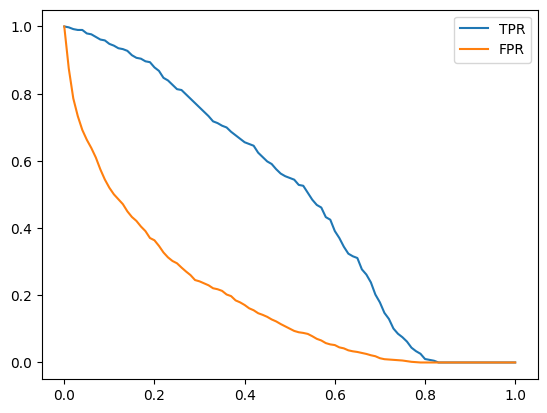

In [69]:
plt.plot(roc_df.threshold, roc_df.tpr, label='TPR')
plt.plot(roc_df.threshold, roc_df.fpr, label='FPR')
plt.legend()

#### Random Model

In [70]:
def tpr_fpr_dataframe(y_val, y_predict):
    scores = []
    thresholds = np.linspace(0,1,101)

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)
        predict_positive = (y_predict >= t)
        predict_negative = (y_predict < t)
        
        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()
        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()
    
        scores.append((t, tp, fp, fn, tn))

    roc_df = pd.DataFrame(scores, columns=['threshold', 'tp', 'fp', 'fn', 'tn'])
    roc_df['tpr'] = roc_df.tp / (roc_df.tp + roc_df.fn)
    roc_df['fpr'] = roc_df.fp / (roc_df.fp + roc_df.tn)

    return roc_df
    

#### Ideal Model
Ideal model should be such that when we order the predictions starting from 0s to 1 (0, 0,0,1,1) the point when
the model switches listing the 1s (churns) after 0s is ideal threshold.

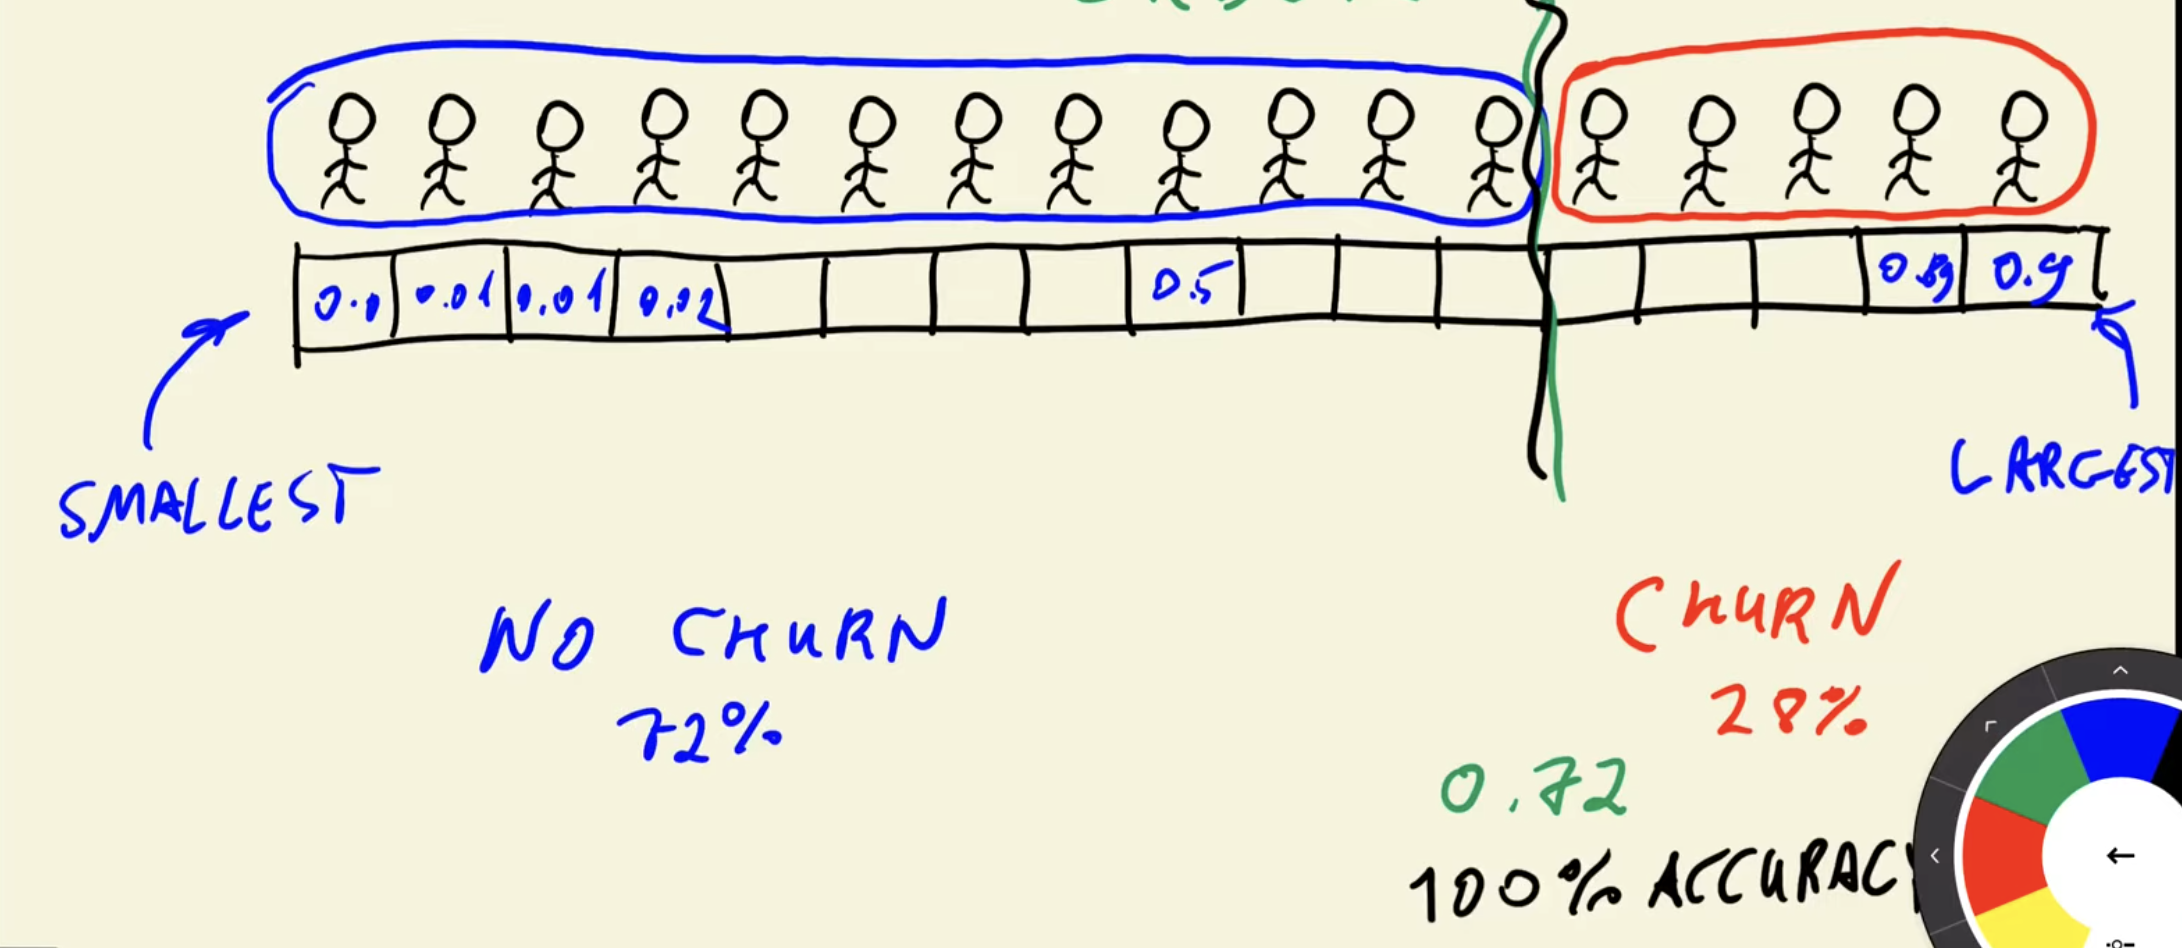

In [71]:
num_negative = (y_val == 0).sum()
num_positive = (y_val == 1).sum()
num_negative, num_positive

(np.int64(1023), np.int64(386))

In [72]:
y_ideal = np.repeat([0,1], [num_negative,num_positive])
y_ideal

array([0, 0, 0, ..., 1, 1, 1], shape=(1409,))

In [73]:
y_ideal_pred = np.linspace(0,1, len(y_ideal)) # Return evenly spaced numbers over a specified interval.
y_ideal_pred

array([0.00000000e+00, 7.10227273e-04, 1.42045455e-03, ...,
       9.98579545e-01, 9.99289773e-01, 1.00000000e+00], shape=(1409,))

In [74]:
1 - y_val.mean()

np.float64(0.7260468417317246)

In [75]:
((y_ideal_pred >= 0.726) == y_ideal).mean()
# if we were to predict everything correctly, number of rows that are bigger than threshold 0.726 would be same as in y_val.

np.float64(1.0)

In [76]:
df_ideal = tpr_fpr_dataframe(y_ideal, y_ideal_pred)
df_ideal[::10]

threshold   tp    fp   fn    tn       tpr       fpr
0          0.0  386  1023    0     0  1.000000  1.000000
10         0.1  386   882    0   141  1.000000  0.862170
20         0.2  386   741    0   282  1.000000  0.724340
30         0.3  386   600    0   423  1.000000  0.586510
40         0.4  386   459    0   564  1.000000  0.448680
50         0.5  386   319    0   704  1.000000  0.311828
60         0.6  386   178    0   845  1.000000  0.173998
70         0.7  386    37    0   986  1.000000  0.036168
80         0.8  282     0  104  1023  0.730570  0.000000
90         0.9  141     0  245  1023  0.365285  0.000000
100        1.0    1     0  385  1023  0.002591  0.000000

#### Putting the ideal and my model together

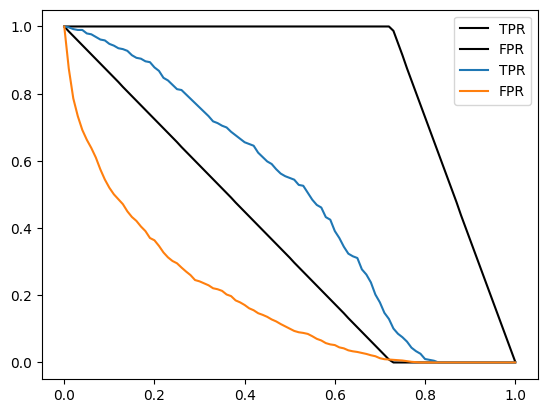

In [77]:
plt.plot(df_ideal.threshold, df_ideal.tpr, label='TPR', color='black')
plt.plot(df_ideal.threshold, df_ideal.fpr, label='FPR', color='black')
plt.plot(roc_df.threshold, roc_df.tpr, label='TPR')
plt.plot(roc_df.threshold, roc_df.fpr, label='FPR')
plt.legend()

#### We can derive area under the curve by using ROC plotting.

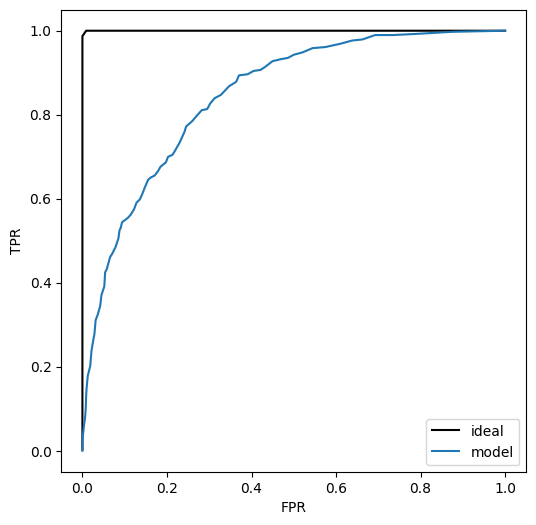

In [78]:
plt.figure(figsize=(6,6))
plt.plot(df_ideal.fpr, df_ideal.tpr, color='black', label='ideal')
plt.plot(roc_df.fpr, roc_df.tpr, label='model')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

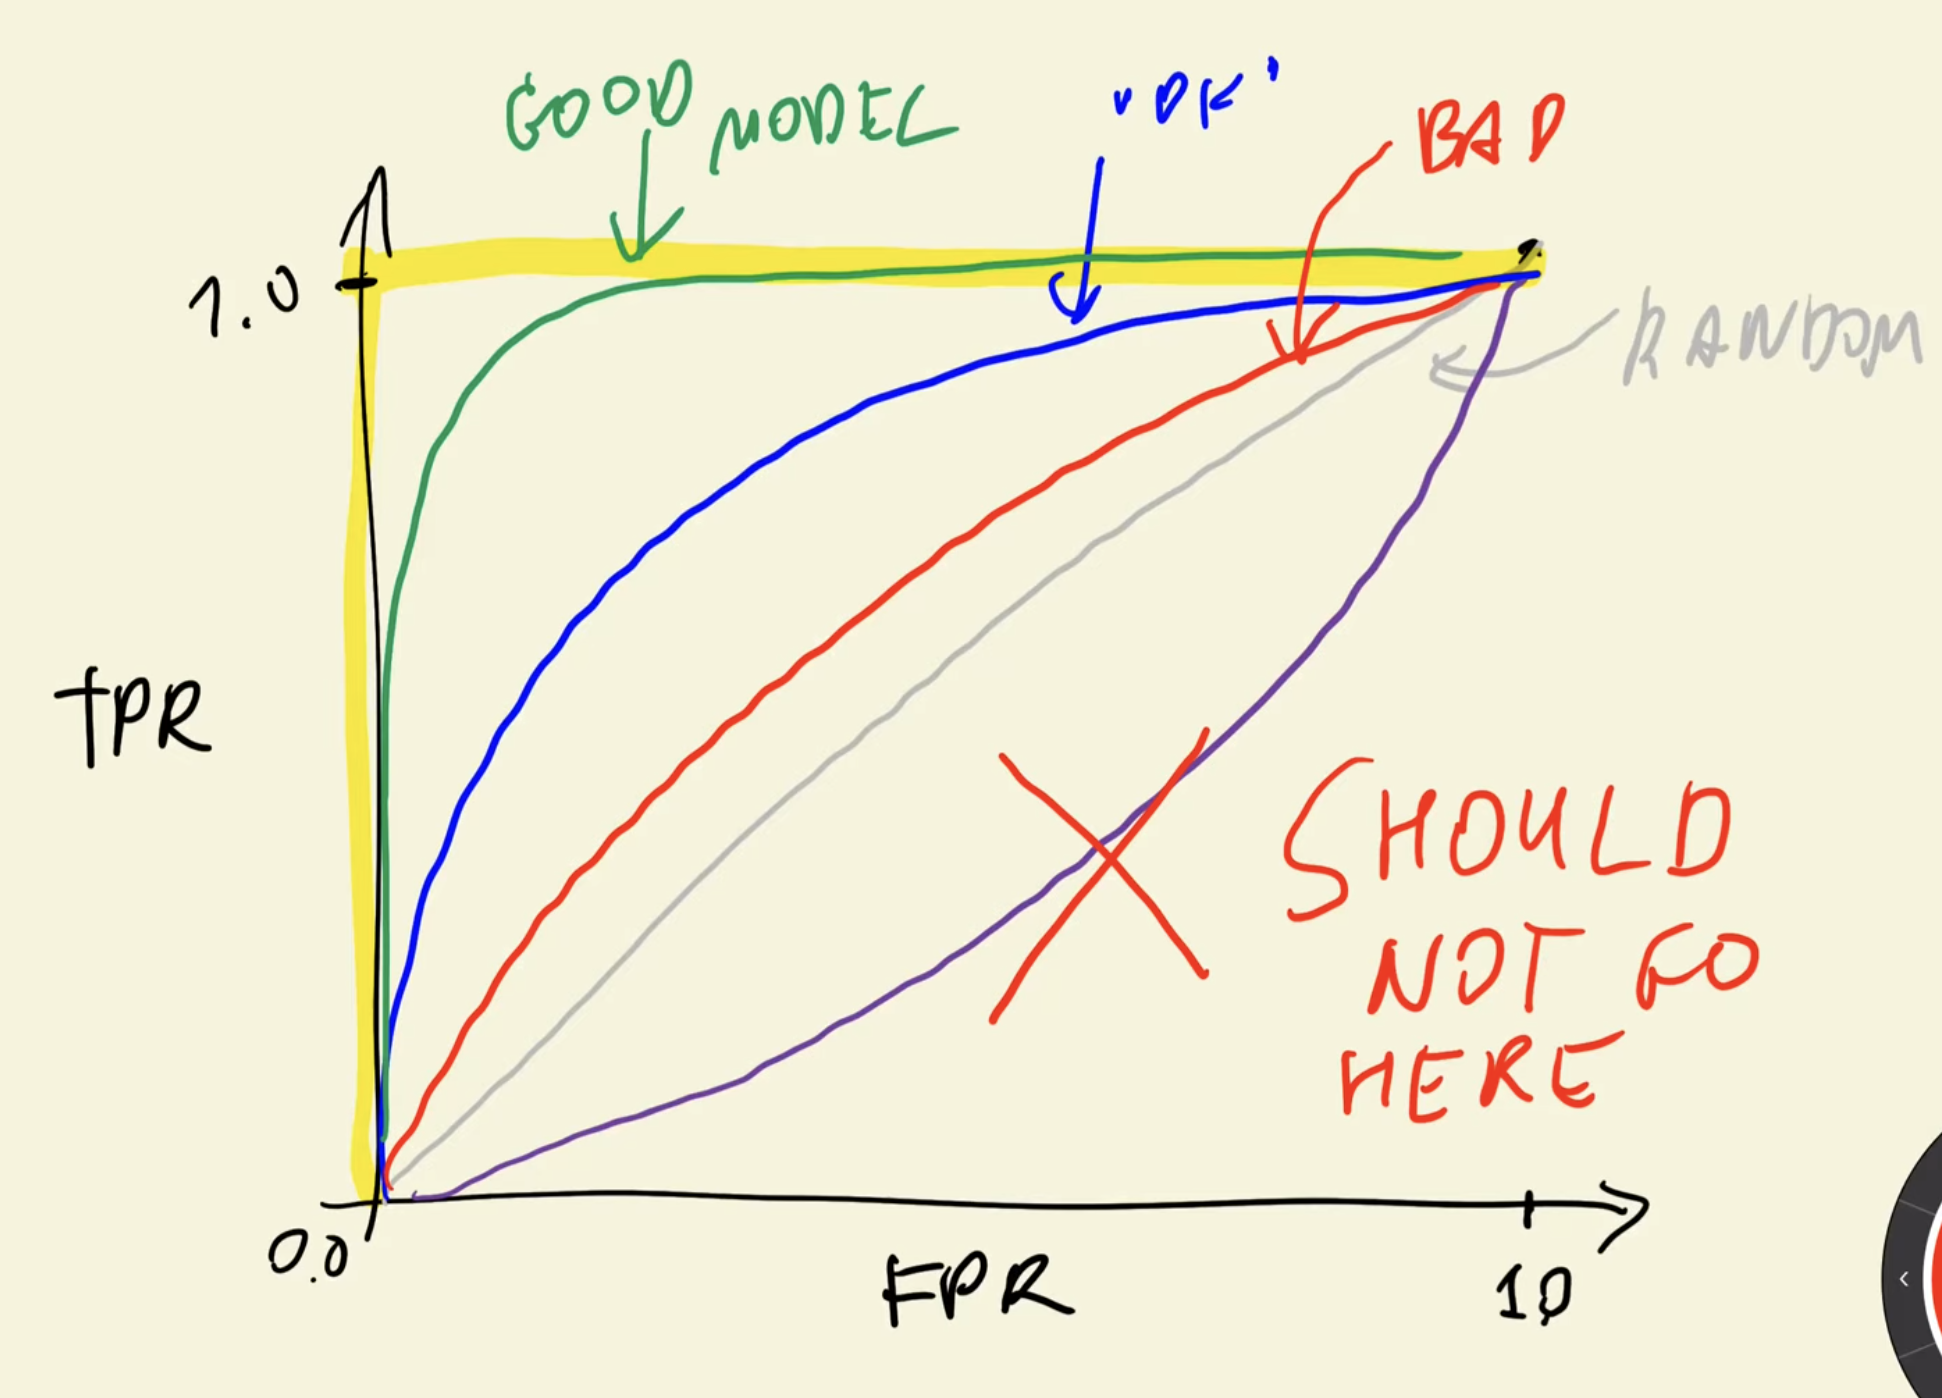

#### Getting the ROC curve with scikit-learn

In [79]:
from sklearn.metrics import roc_curve

In [80]:
fpr, tpr, thresholds = roc_curve(y_val, y_predict)

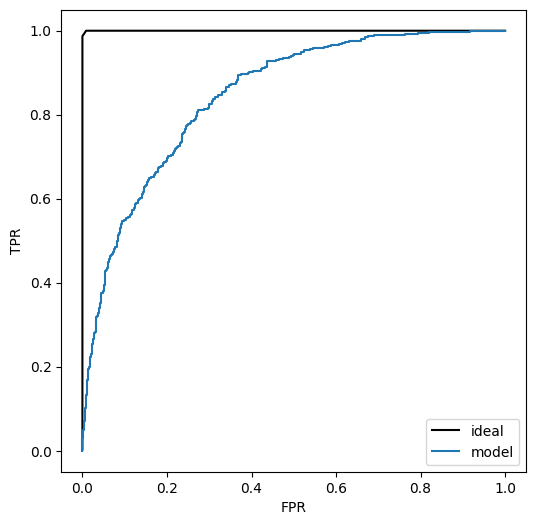

In [81]:
plt.figure(figsize=(6,6))
plt.plot(df_ideal.fpr, df_ideal.tpr, color='black', label='ideal')
plt.plot(fpr, tpr, label='model')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

In [82]:
from sklearn.metrics import auc

In [83]:
auc(fpr, tpr) # area under curve calculation via sklearn

0.846286701208981

In [84]:
# shortcut to handle both roc and auc at once
from sklearn.metrics import roc_auc_score

In [85]:
roc_auc_score(y_val, y_predict)

0.846286701208981

#### What is AUC telling us?
If I randomly sample a negative case and a positive case, the positive case will have a higher predicted risk {AUC} percent of the time.
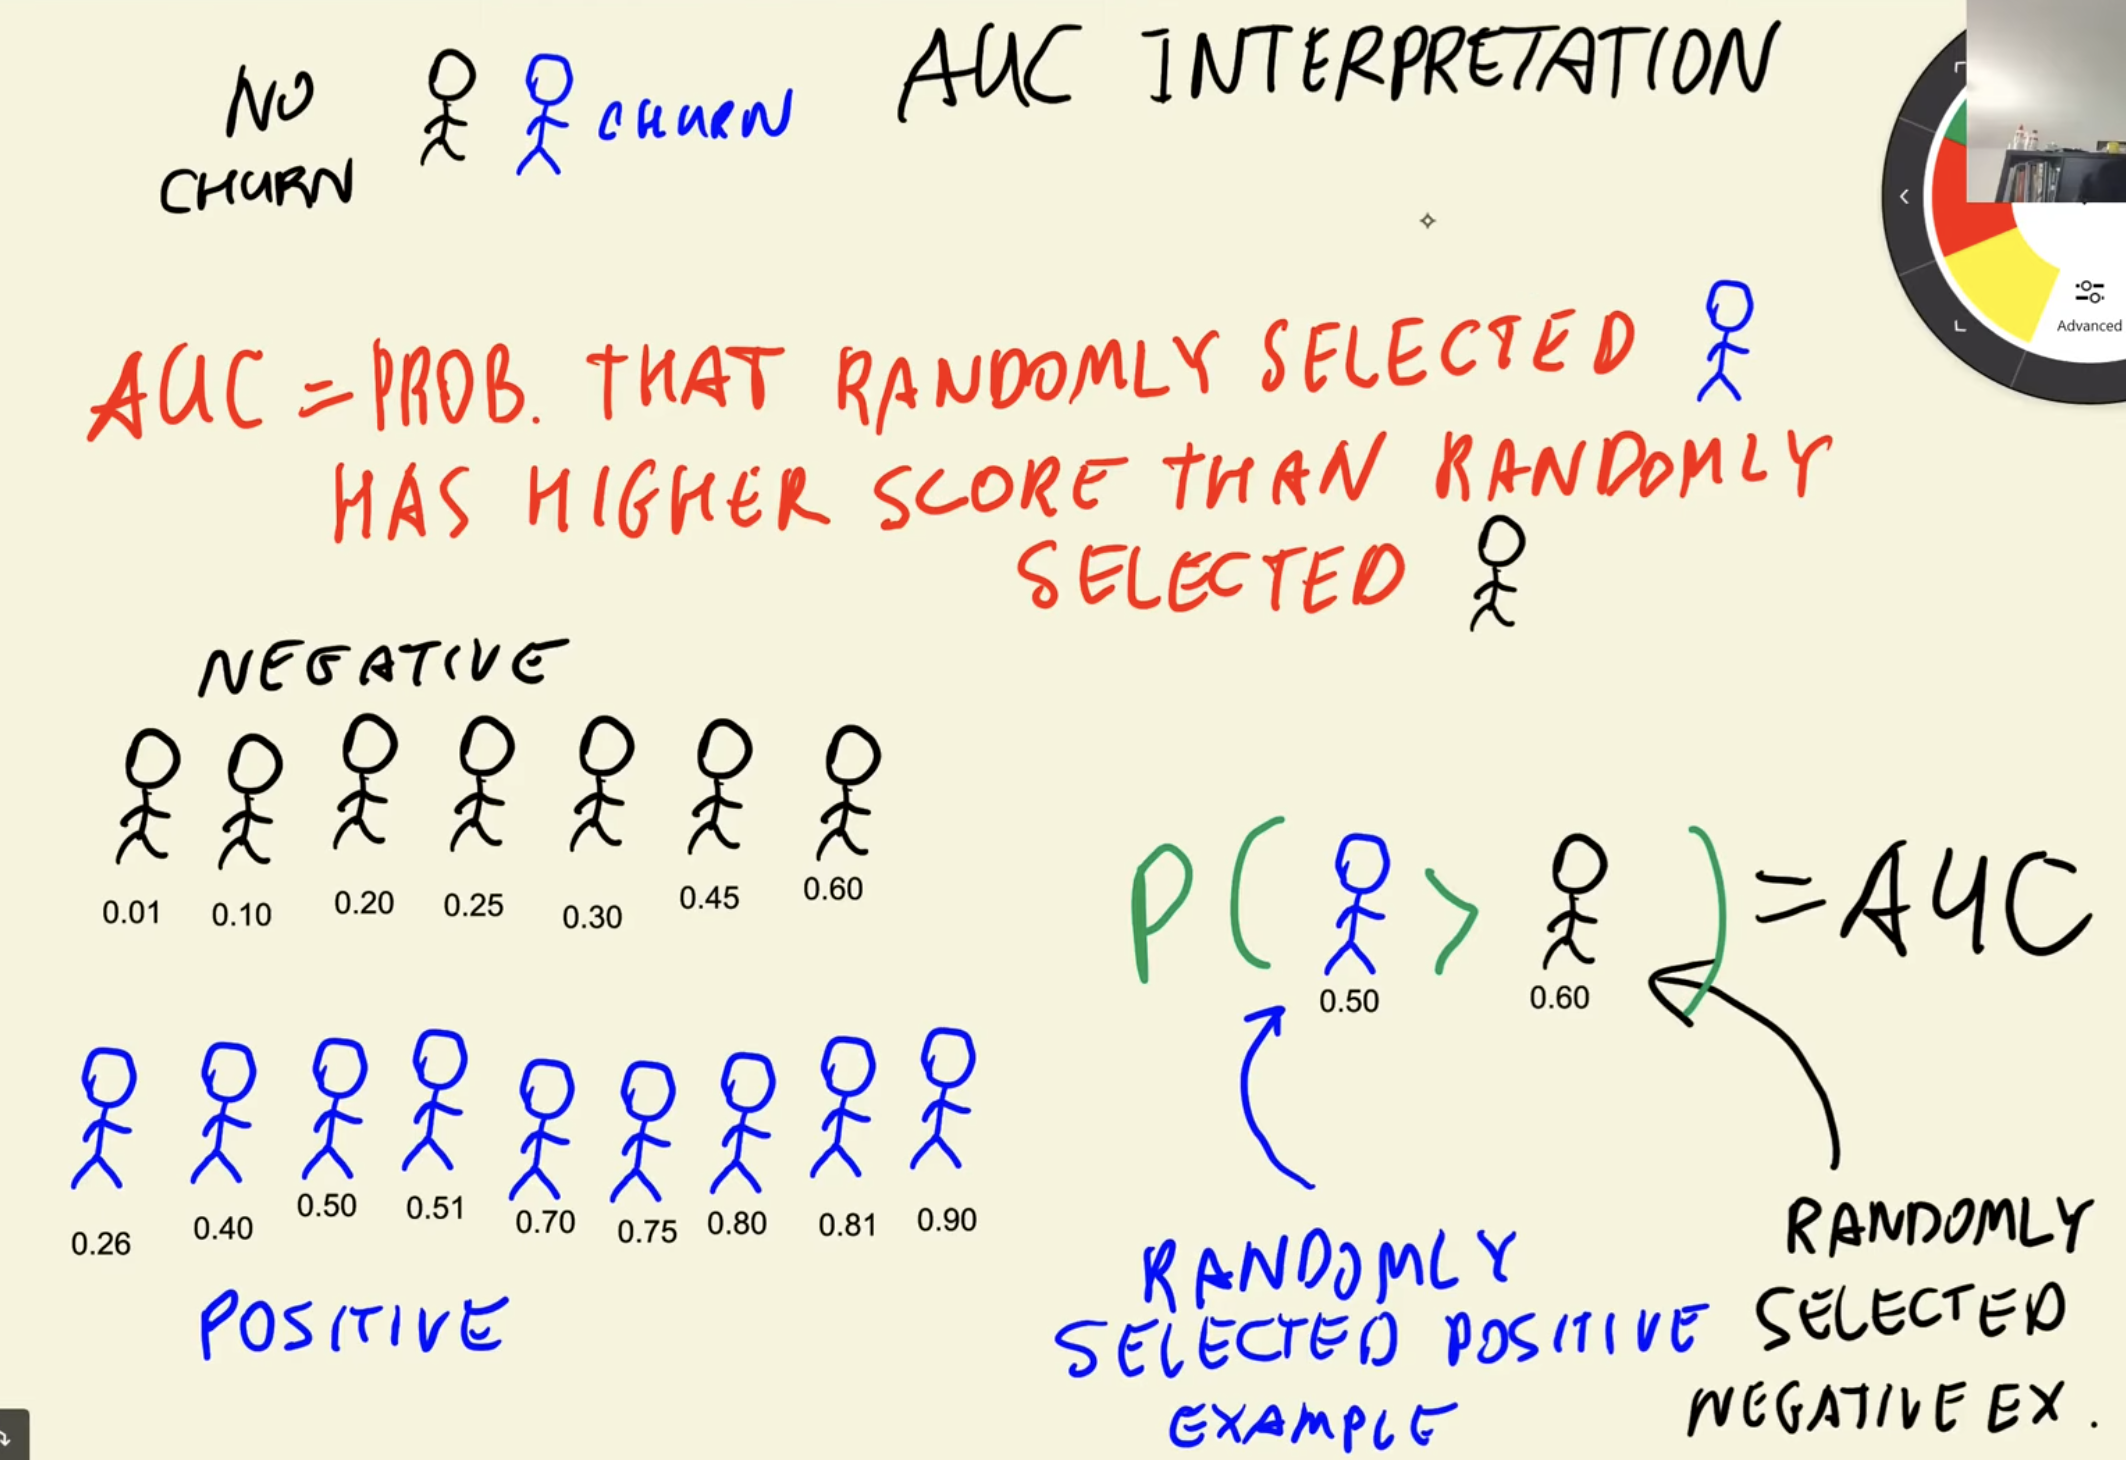

In [86]:
neg = y_predict[y_val == 0]
pos = y_predict[y_val == 1]

In [87]:
import random

In [88]:
pos_ind = random.randint(0,len(pos)-1)
neg_ind = random.randint(0,len(neg)-1)

In [89]:
pos[pos_ind] > neg[neg_ind]

np.True_

#### Calculating AUC manually

In [90]:
n = 10000
score = 0

for i in range(n):
    pos_ind = random.randint(0,len(pos)-1)
    neg_ind = random.randint(0,len(neg)-1)
    if pos[pos_ind] > neg[neg_ind]:
        score += 1
score / n

0.8494

Implementing the manual AUC calculation without loop in numpy

In [91]:
n = 10000
pos_ind = np.random.randint(0,len(pos),size=n)
neg_ind = np.random.randint(0,len(neg),size=n)

In [92]:
pos[pos_ind] > neg[neg_ind]

array([ True,  True,  True, ...,  True,  True,  True], shape=(10000,))

In [93]:
auc_score = (pos[pos_ind] > neg[neg_ind]).mean()
auc_score

np.float64(0.8476)

### 13. Cross-Validation
Evaluates the same model on different subset of the data

In [127]:
def train(df_train, y_train, C=1.0):
    # get the necessary columns, convert to dictionary
    dicts = df_train[categorical + numerical].to_dict(orient='records')
    dv = DictVectorizer(sparse=False) # Transforms lists of feature-value mappings to vectors.
    X_train = dv.fit_transform(dicts) # dv transforms the feature matrix to vectors

    model = LogisticRegression(C=C, max_iter=5000)
    model.fit(X_train, y_train)
    return dv, model

In [95]:
dv, model = train(df_train, y_val)

In [128]:
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')
    X = dv.fit_transform(dicts)
    y_pred = model.predict_proba(X)[:,1]
    return y_pred

In [97]:
predict(df_val, dv, model)

array([0.00666591, 0.2048263 , 0.21770395, ..., 0.15156007, 0.78870418,
       0.81191834], shape=(1409,))

In [98]:
from sklearn.model_selection import KFold

In [99]:
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

In [100]:
!pip install tqdm

In [101]:
from tqdm.auto import tqdm

In [110]:
n_splits = 5
# tqdm creating the progress bar effect
for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 5, 10]):
    scores = []
    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]
    
        y_train = df_train.churn.values
        y_val = df_val.churn.values
    
        dv, model = train(df_train, y_train, C=C)
        y_predict= predict(df_val, dv, model)
    
        auc = roc_auc_score(y_val, y_predict)
        scores.append(auc)
    print(C, np.mean(scores), np.std(scores))

  0%|          | 0/7 [00:00<?, ?it/s]

0.001 0.8261177670578016 0.011823992139514673
0.01 0.8407697017992615 0.011801220634986953
0.1 0.8424468579437789 0.011731549201839235
0.5 0.8425427041132846 0.011719835061279287
1 0.8424845163064638 0.011673833308340029
5 0.8423615037987291 0.011613254468342922
10 0.8423178823761409 0.011608339731699637


In [126]:
df_full_train.shape

(5634, 21)

In [125]:
df_full_train.churn.values

array([0, 1, 0, ..., 1, 1, 0], shape=(5634,))

In [129]:
# Train the full dataset based on the previous insights
y_test

dv, model = train(df_full_train, df_full_train.churn.values, C=1.0)
y_predict= predict(df_test, dv, model)

auc = roc_auc_score(y_test, y_predict)
auc

0.8583517501381259